# Lab8 exercises 3
The main objective of this laboratory is to put into practice what you have learned on regression techniques. You will test several techniques on data with different shape and complexity. In particular, you will build models to approximate univariate analytical functions and multivariate synthetic datasets. Finally, you will adopt the aforementioned techniques to carry out a forecasting task.

Forecasting is the process of making predictions of the future based on past and present data (see forecasting on Wikipedia). The forecasting problem can be solved with machine learning methods (e.g. Linear Regression, Random Forest Regression, Neural Networks) and with complex statistical methods (e.g. ARIMA, Holt Winter). In this exercise you will work with the Second World War Weather dataset trying to predict the next day temperature given the historical trend of temperatures.

The dataset for the second part of the laboratory is a real dataset made available by the National Oceanic and Atmospheric Administration and hosted on Kaggle.

The dataset contains daily information on weather conditions collected during the World War II, starting from 1940-01-01 until 1945-12-31. The data has been collected by 159 weather stations located all around the world for a total of 119040 recordings.
Measurements like Min Temperature, Mean Temperature and Max Temperature have been recorded by the sensors other then the Precipitations in mm and others.
The dataset page at this link contains all the details for each columns of the dataset.

Two files are available in the dataset:
1. SummaryofWeather.csv: it contains the daily measurements collected by the sensors. The fields that are useful for this laboratory are:

- STA: id of the weather station
- Date: the date of the recording
- MaxTemp: daily maximum temperature recorded in degree Celsius 
- MinTemp: daily minimum temperature recorded in degree Celsius
- MeanTemp: daily mean temperature in degree Celsius

2. WeatherStationLocations.csv: it contains some metadata related to the sensors like the Latitude and the Longitude for each sensor. This file is not relevant for the purposes of this laboratory. For further details refer to the information available at this link (https://www.kaggle.com/smid80/weatherww2).

Notice that not all the weather stations collected data for the whole period, thus, the temporal series are characterised by a lot of missing values in many cases. For simplicity you will work only with the data collected by the sensor identified by the id: **22508**. 
This sensor is located at {Lat:21.48333333, Lon:-158.05}, corresponding to the Honolulu Hawaii island. 

The mean temperature measured by sensor 22508 will look like the series showed in Figure:
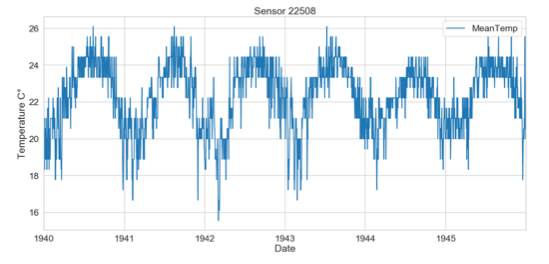

You can download the dataset at:
https://github.com/dbdmg/data-science-lab/raw/master/datasets/weatherww2.zip

#### Exercise 2.3.1
Load the Second World War Weather dataset. In particular you have to load the data contained in Summaryof Weather.csv.

In [1]:
!test -e weatherww2.zip || wget "https://github.com/dbdmg/data-science-lab/raw/master/datasets/weatherww2.zip" -O weatherww2.zip
!test -e weatherww2/summaryofWeather.csv || unzip weatherww2.zip

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('weatherww2/SummaryofWeather.csv')

/var/folders/yc/qmlvyb7j7bb_v_mm5yppzzf80000gn/T/ipykernel_26303/1653610865.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('weatherww2/SummaryofWeather.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

#### Exercise 2.3.2
Inspect the content of the dataset identifying if there are missing values for the sensors in the dataset, checking for the top 10 most complete sensors (in terms of collected data) the distribution of the recorded mean temperatures (MeanTemp column).
• Can you identify if these sensors are located in part of the world with similar weather conditions?.
• Is it necessary to normalize the data in this case?
• Which pre-processing step can be useful to solve the forecasting task?


In [5]:
sensors = pd.read_csv("weatherww2/WeatherStationLocations.csv")
sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   LAT               161 non-null    object 
 4   LON               161 non-null    object 
 5   ELEV              161 non-null    int64  
 6   Latitude          161 non-null    float64
 7   Longitude         161 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.2+ KB


In [6]:
df.groupby("STA").size().sort_values(ascending=False).head(10)

STA
22508    2192
10701    2185
22502    2154
22504    2118
10803    1750
11610    1631
16405    1622
11601    1604
10502    1527
11604    1514
dtype: int64

#### Exercise 2.3.3
For simplicity, we will exploit the data collected by a specific sensor. Filter the data by STA (Station) and extract the mean temperature measurements corresponding to sensor with id 22508. See 1.1 for more details on this sensor.

Info: Do not forget to keep track also of the date on which each measurements has been taken and be sure that each date is properly converted to a Datetime data type like the datetime64 type provided by numpy.

In [7]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

In [8]:
mtemps = df[df["STA"] == 22508]["MeanTemp"]
print(f"Avarage temperature in 22508 station: {mtemps.count()}")
mtemps.head(5)

Avarage temperature in 22508 station: 2192


Date
1940-01-01    20.000000
1940-01-02    19.444444
1940-01-03    20.000000
1940-01-04    21.111111
1940-01-05    18.333333
Name: MeanTemp, dtype: float64

#### Exercise 2.3.4
Now you should have an array containing all the measurements collecte db ysensor 22508 representing the time series of the mean temperatures. Plot the temperatures time series exploiting matplotlib and show on the x axis the corresponding datetimes.

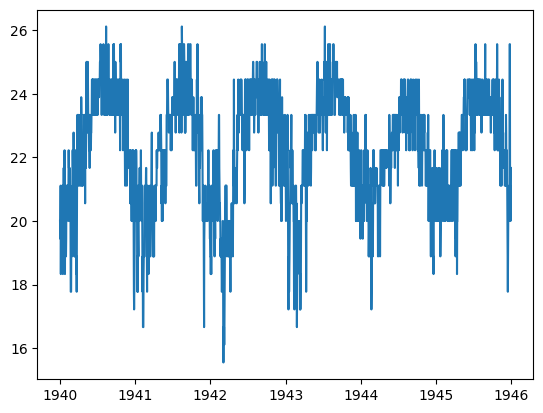

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
_ = ax.plot(mtemps.index.values, mtemps.values)
# or equivalently
# mtemps.plot(ax=ax) 

#### Exercise 2.3.5
To predict the next day temperature, a rolling window pre-processing should be performed to convert the time series into a structured dataset. The rolling windows on the time series can be applied by extracting, from the original time series, a window of length W that moves over the series, with step 1, like the example showed in Figure 3. The dependent variable to be predicted will be the value positioned at t + W + 1, where t is the position of the rolling window. The final structure of the dataset extracted with the rolling window will be similar to the one showed in Table 1.

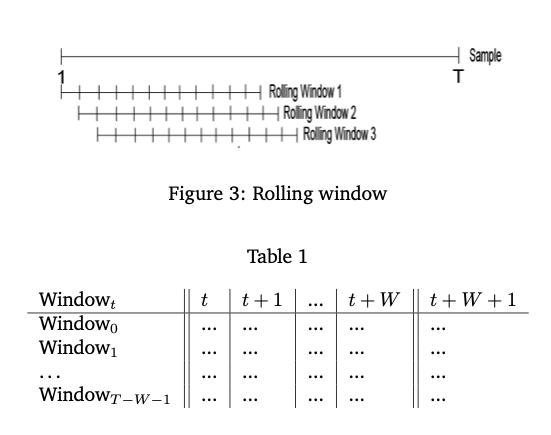

In [10]:
W = 3
X = list()
y = list()

In [11]:
import numpy as np

for i in range(mtemps.size - W): # range: [0, mtemps.size - W - 1]
    X.append(mtemps.iloc[i:i + W].values.T) # transpose to create a row array
    y.append(mtemps.iloc[i + W])

# transform the structured representation into numpy arrays
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((2189, 3), (2189,))

In [12]:
# We can check whether the rolling window has worked properly inspecting a few samples.
mtemps[:5]

Date
1940-01-01    20.000000
1940-01-02    19.444444
1940-01-03    20.000000
1940-01-04    21.111111
1940-01-05    18.333333
Name: MeanTemp, dtype: float64

In [13]:
X[:3,:]

array([[20.        , 19.44444444, 20.        ],
       [19.44444444, 20.        , 21.11111111],
       [20.        , 21.11111111, 18.33333333]])

In [14]:
y[:3]

array([21.11111111, 18.33333333, 20.        ])

Given a record associated with the day t, y[t] is the value taken by the series at the day t+W+1 (i.e. mtemps[t+W]), which seems correct.

#### Exercise 2.3.6
Split the dataset into train and test sets and keep in mind that you are evaluating the forecasting of a time series. To train your model you can consider to use the data from 1940 to 1944 and test the trained models on 1945 data. A different way of performing the cross validation on time series is the TimeSeriesSplit strategy available in Scikit-learn.

In [15]:
X_df = pd.DataFrame(X, index=mtemps.index[:mtemps.size - W],
                    columns=["t0", "t1", "t2"])
X_df.head()

,t0,t1,t2
Date,,,
1940-01-01,20.000000,19.444444,20.000000
1940-01-02,19.444444,20.000000,21.111111
1940-01-03,20.000000,21.111111,18.333333
1940-01-04,21.111111,18.333333,20.000000
1940-01-05,18.333333,20.000000,20.555556


In [16]:
y_s = pd.Series(y, index=mtemps.index[:mtemps.size - W])
y_s.head()

Date
1940-01-01    21.111111
1940-01-02    18.333333
1940-01-03    20.000000
1940-01-04    20.555556
1940-01-05    18.888889
dtype: float64

In [17]:
X_train, y_train = X_df.loc["1940":"1944"], y_s.loc["1940":"1944"] 
X_train.index

DatetimeIndex(['1940-01-01', '1940-01-02', '1940-01-03', '1940-01-04',
               '1940-01-05', '1940-01-06', '1940-01-07', '1940-01-08',
               '1940-01-09', '1940-01-10',
               ...
               '1944-12-22', '1944-12-23', '1944-12-24', '1944-12-25',
               '1944-12-26', '1944-12-27', '1944-12-28', '1944-12-29',
               '1944-12-30', '1944-12-31'],
              dtype='datetime64[ns]', name='Date', length=1827, freq=None)

In [18]:
# Fix data leakage
from datetime import date
initial_day = date(1944, 12, 31) + pd.Timedelta(f"{W} days")
initial_day

datetime.date(1945, 1, 3)

In [19]:
X_test, y_test = X_df.loc[initial_day:], y_s.loc[initial_day:] 
X_test.shape

(360, 3)

#### Exercise 2.3.7
Now,usingtheregressiontechniquesthatyouhavelearned,trytoidentifywhichisthemostaccurate regression model evaluating the r2_score and the mean_squared_error.

Skip

#### Exercise 2.3.8
To visualize the forecasted time series with respect to the real test time series, plot the test values and the forecasted values on the same chart.
- Are the two series similar?
- Have the seasonality and the trend of the series been correctly predicted?
- Are you able to predict a horizon longer than 1 day with this kind of techniques? Why?


'The average |error| is: 0.65 +- 0.59 degrees Celsius'

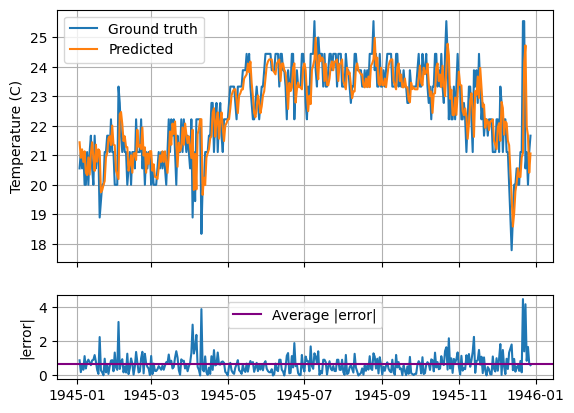

In [20]:
from sklearn.linear_model import Ridge
model = Ridge(random_state=42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
y_hat = pd.Series(y_hat, index=y_test.index)    
error = y_test - y_hat

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].plot(y_test, label="Ground truth")
ax[0].plot(y_hat, label="Predicted")
ax[0].set_ylabel("Temperature (C)")
ax[0].legend()
ax[0].grid()
ax[1].plot(error.abs())
ax[1].set_ylabel("|error|")
ax[1].axhline(error.abs().mean(), color="purple", label = "Average |error|")
ax[1].legend()
ax[1].grid()

f"The average |error| is: {error.abs().mean():.2f} +- {error.abs().std():.2f} degrees Celsius"